# Mini-project 2 : Customer Feedback Analysis Project

---

## Your task :

The goal of this project is to analyze customer feedback from a dataset of product reviews using natural language processing with ChatGPT. We aim to identify key themes, sentiments, and areas for product improvement based on customer opinions.


## Dataset Overview

The dataset is in JSON format within a GZ (zipped) file. It includes several fields related to product reviews, such as reviewer ID, product ID, reviewer name, review text, helpfulness rating, overall product rating, review summary, and review timestamp. Here’s a brief description of the columns:

- **reviewerID**: Unique ID of the reviewer (e.g., A2SUAM1J3GNN3B)
- **asin**: Unique ID of the product (e.g., 0000013714)
- **reviewerName**: Name of the reviewer
- **helpful**: Helpfulness rating of the review (e.g., 2/3)
- **reviewText**: Full text of the review
- **overall**: Rating of the product on a scale of 5
- **summary**: Summary of the review
- **unixReviewTime**: Time of the review in UNIX timestamp
- **reviewTime**: Time of the review in raw format


## Requirements

- Python 3.6+
- Libraries: pandas, json, gzip, openai
- An API key from Gemini

---

## Setup Instructions

1. Environment Setup:
Ensure Python 3.6 or later is installed on your system. Install the required Python libraries using pip:

In [1]:
# !pip install pandas openai seaborn matplotlib httpx nest-asyncio

In [2]:
# data manipulation and analysis
import pandas as pd 

# for accessing OpenAI's API
import openai

# file handling and regular expressions
import zipfile
import re

# informative plots
import seaborn as sns
import matplotlib.pyplot as plt

# for handling concurrent HTTP requests
import asyncio
import nest_asyncio
from httpx import AsyncClient

2. OpenAI API Access:

Sign up for OpenAI and retrieve your API key from the OpenAI platform if you did not already do it.

In [3]:
from config import api_key

3. Dataset Preparation:

Download the Dataset: [Amazon Musical Instruments Review](https://www.kaggle.com/datasets/eswarchandt/amazon-music-reviews/data) and place it in a working directory. Ensure you have software to decompress the GZ file.

---

## Project Tasks

1. Data Loading and Preprocessing:

  - Use gzip and json libraries to load the dataset.
  - Clean and prepare the data for analysis, focusing on the reviewText, overall, and summary fields.

2. Natural Language Analysis with ChatGPT:

  - Utilize the OpenAI API to send natural language queries about the dataset to ChatGPT.
  - Analyze common themes, sentiments, and improvement suggestions based on the reviewText.

3. Data Analysis:

  - Categorize the feedback into themes and sentiments.
  - Summarize the analysis results, highlighting the most common feedback themes and overall sentiment.

4. Visualization:

  - Create visualizations such as bar charts for common themes and pie charts for sentiment distribution.


## Deliverables

A Python script for data loading, preprocessing, and querying Gemini.


## 1. Data Loading and Preprocessing:

- Use gzip and json libraries to load the dataset.
- Clean and prepare the data for analysis, focusing on the reviewText, overall, and summary fields.



In [4]:
# specify the path to the zip file
path = 'Amazon Musical Instruments Reviews.zip'

# open the zip file and write its content into a new folder
# we employ zipfile because its a ZIP and not a GZIP!!!!!!
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall('') # without specifying, it goes straight to the current directory

In [5]:
path_to_json = 'Amazon Musical Instruments Reviews/Amazon Musical Instruments Reviews/Musical_Instruments_5.json'

In [6]:
# make it a df
df = pd.read_json(path_to_json, lines=True)

# stop anoying manipulation messages
df = df.copy()

# show it
display(df.head())
print(f"## The dataset dimensions are {df.shape}")

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


## The dataset dimensions are (10261, 9)


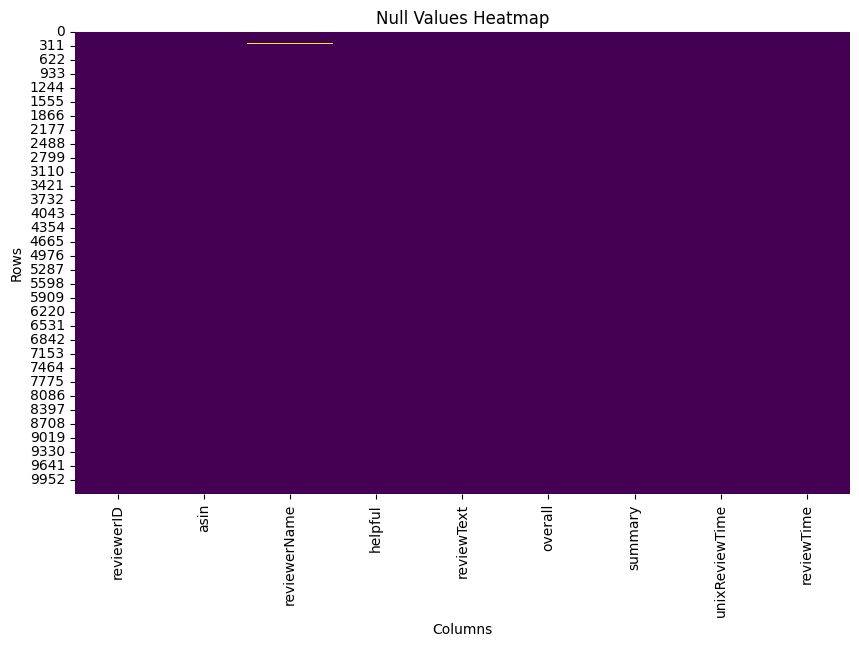

## There are a total of 27 null values in the dataset


In [7]:
# null values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Null Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

print(f"## There are a total of {df.isnull().sum().sum()} null values in the dataset")

We have only 27 missing values from a total of 10261 rows, we proceede to delete them

In [8]:
df.dropna(inplace=True)

# check it out
print(f"## There are a total of {df.isnull().sum().sum()} null values in the dataset")

## There are a total of 0 null values in the dataset


We also search for duplicates

In [9]:
# we cant because there is an unhashable column that contains lists
# print(f"## There are a total of {df.duplicated().sum()} duplicate rows in the dataset")

In [10]:
# remove non alphanumeric characters and convert to lowercase
df['reviewText'] = df['reviewText'].astype(str).str.replace(r'[^a-zA-Z0-9\s]', '', regex=True).str.lower()
df['summary'] = df['summary'].astype(str).str.replace(r'[^a-zA-Z0-9\s]', '', regex=True).str.lower()

display(df.head())

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",not much to write about here but it does exact...,5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",the product does exactly as it should and is q...,5,jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",the primary job of this device is to block the...,5,it does the job well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",nice windscreen protects my mxl mic and preven...,5,good windscreen for the money,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",this pop filter is great it looks and performs...,5,no more pops when i record my vocals,1392940800,"02 21, 2014"


## 2. Natural Language Analysis with ChatGPT:

  - Utilize the OpenAI API to send natural language queries about the dataset to ChatGPT.
  - Analyze common themes, sentiments, and improvement suggestions based on the reviewText.

We were told previously to focus on the reviewText, overall, and summary fields.

We should also try not to exceed 30 requests at the time, so we should batch them

Also the prompting should be such as to encourage consistent responses (so we can analyze), e.g.:

1. Top 3 Themes: List the three most common themes.
2. Sentiment: Provide the overall sentiment (Positive/Negative/Neutral)
3. Key Points: Summarize 3 key points from the reviews

We set the OpenAI API key and limit the dataframe. We limit the dataframe for two reasons:

1. I don't want to consume all the tokens, so the rest of my partners can work

2. The batch sweaping takes a while, and sweappig on 10k rows is going to take way too long. We want enough statistic to prove the code works.

In [11]:
# set openai api key
openai.api_key = api_key

# limit the dataframe to not consume all the tokens
df_subset = df.iloc[:900].copy()

# for full dataset simply uncomment below:
# df_subset = df.copy()

We employ asynchronous requests to enhace app responsiveness, scalability and overall performance. Also we define the batch-processing function:

In [12]:
# asynchronous function to analyze a review
async def analyze_review_async(review_text, overall, summary, client):
    """
    takes a product review's text, overall rating, and summary,\n
    constructs a prompt for the OpenAI model to analyze the review, and \n
    sends an asynchronous request to the OpenAI API.\n

    returns the analysis as a string.
    """
    prompt = (
        f"Please analyze the following product review:\n\n"
        f"Review Text: {review_text}\n"
        f"Overall Rating: {overall}\n"
        f"Summary: {summary}\n\n"
        "1. List the three most common themes (just a plain comma separated list).\n"
        "2. Provide the overall sentiment (Positive/Negative/Neutral).\n"
        "3. Summarize 3 key points from the reviews (just a plain comma separated list)."
    )
    try:
        # define the model
        response = await client.post(
            "https://api.openai.com/v1/chat/completions",
            json={
                "model": "gpt-3.5-turbo",
                "messages": [{"role": "user", "content": prompt}],
                "max_tokens": 150, # we want even less than 150
                "temperature": 0.1, # very cold, very short and analytic answers
            },
            headers={"Authorization": f"Bearer {openai.api_key}"}
        )
        return response.json()["choices"][0]["message"]["content"].strip()
    except Exception as e:
        return f"Error: {str(e)}"

# batch processing
async def analyze_reviews_in_batches(df, batch_size=30):
    """
    analyzes product reviews in batches using the OpenAI API\n
    args: dataframe, batch size\n
    returns: list of analysis results
    """
    results = []
    async with AsyncClient() as client:
        for i in range(0, len(df), batch_size):
            batch = df.iloc[i:i+batch_size]
            tasks = [
                analyze_review_async(row["reviewText"], row["overall"], row["summary"], client)
                for _, row in batch.iterrows()
            ]
            batch_results = await asyncio.gather(*tasks)
            results.extend(batch_results)
    return results

**Jupyter Notebook Compatibility**

- In Jupyter Notebooks, if the event loop is already running, it can cause issues when trying to run asynchronous code. To handle this, we check if the loop is running and create a new task if it is. This approach ensures that our asynchronous functions work seamlessly within the Jupyter environment, allowing for efficient execution of tasks without blocking the notebook interface.

In [13]:
# function to process reviews (works in Jupyter/IPython)
def process_reviews(df, batch_size=30):
    """
    for Jupyter/IPython, create a new task instead of running the loop\n
    args: dataframe, batch size\n
    returns: list of analysis results
    """
    loop = asyncio.get_event_loop()
    if loop.is_running():
        # for Jupyter/IPython, create a new task instead of running the loop
        return loop.create_task(analyze_reviews_in_batches(df, batch_size))
    else:
        return asyncio.run(analyze_reviews_in_batches(df, batch_size))

# Usage
results_task = process_reviews(df_subset)

# collect the results asynchronously when running in Jupyter
nest_asyncio.apply()  # allows nested event loops in Jupyter
results = asyncio.run(results_task)

# store the results back in the dataframe
df_subset["analysis"] = results

In [14]:
# function to split the analysis output into separate columns
def split_analysis_to_columns(analysis):
    """
    it splits the analysis output into separate columns\n
    args: analysis output\n
    returns a list: themes, sentiment, key points
    """
    try:
        # split the text by numbered bullets (how we got it from the response)
        parts = analysis.split("\n")

        # use regex to remove the number and dot at the beginning of each part
        themes = re.sub(r'^\d+\.\s*', '', next((part.split(": ", 1)[-1] for part in parts if part.startswith("1.")), "")).strip()
        sentiment = re.sub(r'^\d+\.\s*', '', next((part.split(": ", 1)[-1] for part in parts if part.startswith("2.")), "")).strip()
        key_points = re.sub(r'^\d+\.\s*', '', next((part.split(": ", 1)[-1] for part in parts if part.startswith("3.")), "")).strip()

        return themes, sentiment, key_points
    except Exception as e:
        return "", "", f"Error: {str(e)}"

# apply the splitting function to the results
df_subset[["Themes", "Sentiment", "Key Points"]] = pd.DataFrame(
    df_subset["analysis"].apply(split_analysis_to_columns).tolist(),
    index=df_subset.index
)

# # drop the old 'analysis' column cause we dont need it anymore
# df_subset = df_subset.drop(columns=["analysis"])

# check dataframe so far
print(df_subset[["Themes", "Sentiment", "Key Points"]].head(15))

                                               Themes Sentiment  \
0                 Functionality, Price, Effectiveness  Positive   
1   Product performance, Affordability, Pleasant a...  Positive   
2              Functionality, Ease of Use, Durability  Positive   
3   Windscreen protection, Pop prevention, Goosene...  Positive   
4            Performance, appearance, vocal recording  Positive   
5                         Quality, Sound, Ease of Use  Positive   
6      Lifetime warranty, durability, value for price  Positive   
7   Cable compatibility, Brand comparison, Price c...  Negative   
8       Well constructed, 90 degree plug, great cable  Positive   
9             Quality, Lifetime Warranty, Reliability  Positive   
10  Comparison to more expensive models, Reliabili...  Positive   
11              Need, Frequency of use, Functionality   Neutral   
12                 Size, awkwardness, getting used to   Neutral   
13                       Love, works great, recommend  Positiv

## 3. Data Analysis:
- Categorize the feedback into themes and sentiments.
- Summarize the analysis results, highlighting the most common feedback themes and overall sentiment.

Some text processing is still needed. First we need to convert all to lower case, then we need to divide the columns 'Themes' and 'Key Points' in three, then count the values individually.

In [15]:
# always make a backup for the backup
df_analysis = df_subset.copy()

# convert columns to lower case
df_analysis["Themes"] = df_analysis["Themes"].str.lower()
df_analysis["Sentiment"] = df_analysis["Sentiment"].str.lower()
df_analysis["Key Points"] = df_analysis["Key Points"].str.lower()

# split Themes into themes_1, themes_2 and themes_3 splitting by comma
temp_df = df_analysis["Themes"].str.split(", ", expand=True)
df_analysis["themes_1"] = temp_df[0]
df_analysis["themes_2"] = temp_df[1]
df_analysis["themes_3"] = temp_df[2]
df_analysis = df_analysis.drop(columns=["Themes"])

# repeat for Key Points
temp_df = df_analysis["Key Points"].str.split(", ", expand=True)
df_analysis["key_points_1"] = temp_df[0]
df_analysis["key_points_2"] = temp_df[1]
df_analysis["key_points_3"] = temp_df[2]
df_analysis = df_analysis.drop(columns=["Key Points"])

# check result
display(df_analysis[["Sentiment", "themes_1", "themes_2", "themes_3", "key_points_1", "key_points_2", "key_points_3"]].head())

,Sentiment,themes_1,themes_2,themes_3,key_points_1,key_points_2,key_points_3
0,positive,functionality,price,effectiveness,filters out pop sounds,recordings are more crisp,good value for the price.
1,positive,product performance,affordability,pleasant aroma,product does exactly as it should,affordable,pleasant aroma reminiscent of old grape candy
2,positive,functionality,ease of use,durability,blocks popping sounds effectively,allows voice through without reduction in volu...,secure metal clamp mount.
3,positive,windscreen protection,pop prevention,gooseneck stability,good value for money,effective at protecting mic,requires careful positioning for stability
4,positive,performance,appearance,vocal recording,eliminates pops,looks like a studio filter,great for recording vocals


In [16]:
# for more common sentiments we just count values
df_sentiments = pd.DataFrame(df_analysis["Sentiment"].value_counts().reset_index())
df_sentiments.columns = ["Sentiment", "Count"]
display(df_sentiments)
print()

# for more common themes we need to concatenate them in a single column df
# after that we count values
df_themes = df_analysis[["themes_1", "themes_2", "themes_3"]].copy()
df_themes = df_themes.stack().reset_index(drop=True)
df_themes.name = "Theme"
df_themes = pd.DataFrame(df_themes.value_counts().reset_index())
df_themes.columns = ["Theme", "Count"]
display(df_themes.head(10))

,Sentiment,Count
0,positive,746
1,negative,76
2,neutral,71
3,,2
4,ion system compatibility,1
5,good value for home recording,1
6,not suitable for bigger instruments,1
7,3,1
8,"best picks, good deal",1


,Theme,Count
0,durability,181
1,quality,122
2,sound quality,80
3,price,78
4,ease of use,64
5,functionality,57
6,value for money,48
7,performance,37
8,versatility,36
9,value,33


There are some minor errors in the sentiment retrieving, but 6 wrong from ~900 is something we can pass :-)

## 4. Visualization:
- Create visualizations such as bar charts for common themes and pie charts for sentiment distribution.

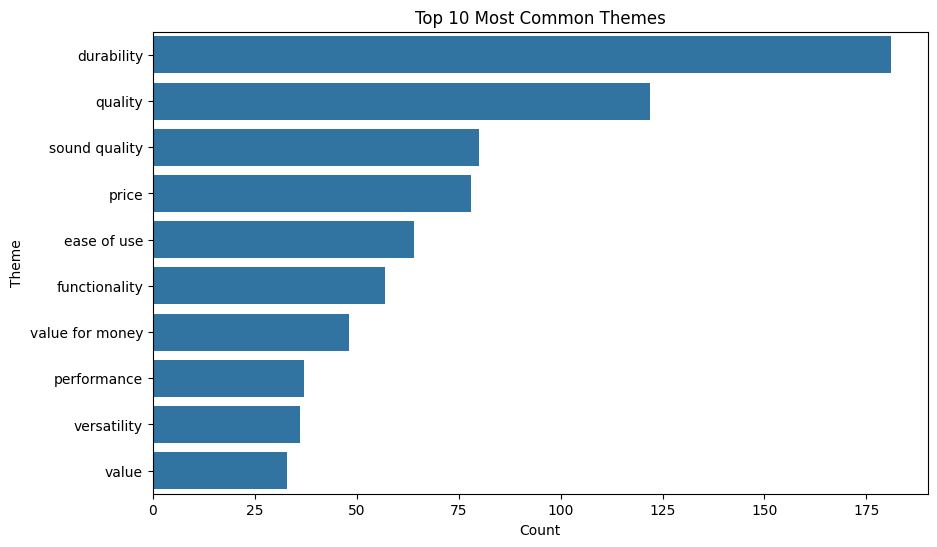

In [17]:
# bar chart for themes
plt.figure(figsize=(10, 6))
sns.barplot(x="Count", y="Theme", data=df_themes.head(10))
plt.title("Top 10 Most Common Themes")
plt.xlabel("Count")
plt.ylabel("Theme")
plt.show()

The most touched theme is 'durability', followed by 'quality' and 'sound quality'. By focusing on durability, quality, and sound quality, while addressing specific concerns like price and ease of use, businesses can enhance customer satisfaction and drive sales growth in a competitive marketplace. Regularly monitoring these themes through customer feedback will allow for continuous improvement and adaptation to market demands.

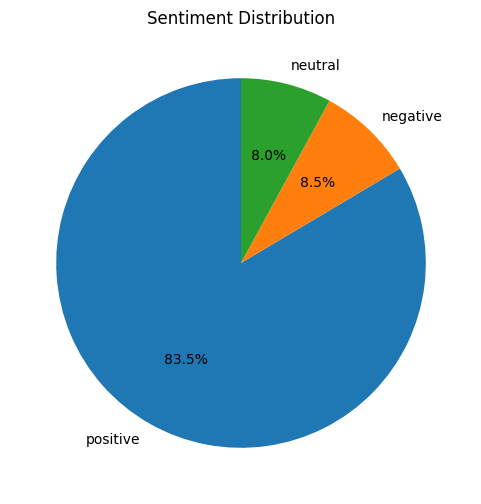

In [19]:
# from steniments we only take those with more than some threshold to avoid errors
df_sentiments = df_sentiments.head(3)

# pie chart for sentiment distribution
plt.figure(figsize=(6, 6))
plt.pie(df_sentiments["Count"], labels=df_sentiments["Sentiment"], autopct='%1.1f%%', startangle=90)
plt.title("Sentiment Distribution")
plt.show()

Overall, the sentiment analysis reflects a predominantly favorable view of the business, but attention should be paid to the negative and neutral sentiments to ensure continued success and improvement in customer satisfaction.

---

## Conclusions

We performed a customer feedback analysis using the "Amazon Musical Instruments Reviews" dataset. The customer feedback was cleaned and processed using OpenAI's API. The requests were batched to retrieve the most prevalent themes, sentiments, and key points. In other words, by means of a large language model (LLM), we were able to extract the key features we were searching for through natural language processing.

The most touched theme is 'durability', followed by 'quality' and 'sound quality'. By focusing on durability, quality, and sound quality, while addressing specific concerns like price and ease of use, businesses can enhance customer satisfaction and drive sales growth in a competitive marketplace. Regularly monitoring these themes through customer feedback will allow for continuous improvement and adaptation to market demands.

Overall, the sentiment analysis reflects a predominantly favorable view of the business, but attention should be paid to the negative and neutral sentiments to ensure continued success and improvement in customer satisfaction.

---

## Future Steps

- Fix the prompt error retrieval on 'setiment'
- Use also the retrieved keypoints (could be done now with a cloud of words, but I really hate that nonsensic graph.)
- Work with the full dataset to get a better statistic